---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


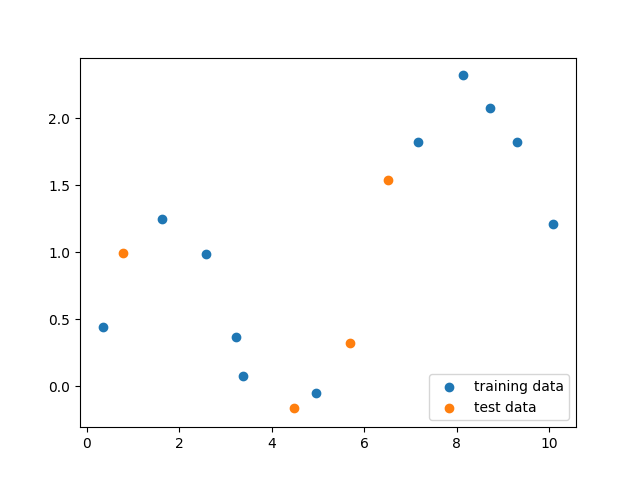

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Generates some data
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

# Splits data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.

# 2 sets of data are graphed: one for X_train/y_train and another one for X_test/y_test
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   

# Lets see our data points
#part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [2]:
#### Detailed description of the process to solve answer_one() ####

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

### Lets test everything with a polynomial degree of 2. If it works we can iterate and calculate more degrees ###
### First: we transform the features values to a polynomial ###

# Generate a polynomial object and define its degree
# When PolynomialFeatures is used along with LinearRegression include_bias=False must be used, if not a column 
# of 1s will be added and there will be a dimensional incompatibility when fitting and transforming.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Change the shape of the array containing the features from 1D to 2D. Every feature should be a 2D array, where 
# the feature/s is a column.
# array.reshape(-1,1) --> the -1 is a wildcard that adopts any value considering the other value in reshape.
# In this case one column is defined so the numer of rows will be calculated accordingly.
X_train = X_train.reshape(-1,1)

# Creating new variables: we define the feature to be transformed and we transform it according to the previous chosen degree
# The original features are transformed and saved in X_train_poly
X_train_poly = poly.fit_transform(X_train)


### Second: We make a LinearRegression from the polynomial ###

# Generate a LinearRegression object
linreg = LinearRegression()

# We train our model by giving it the features(polynomial in this case) and the response y values
# It will solve the coefficients of our polynomial function
linreg.fit(X_train_poly, y_train)

### Predictions
# Now that our model has been trained we can predict the responses (y_predicted) based on the poly_features and the
# estimated coefficients.
# I want to estimate y_values for a range of values from 0 to 10, so I create X_predict_input
X_predict_input = np.linspace(0, 10, 100).reshape(-1,1)

# IMPORTANT: the values to predict must also be transformed to the same polynomial degree as the X_train(features) 
X_predict_input_poly = poly.fit_transform(X_predict_input)

# Now lets predict
y_predicted = linreg.predict(X_predict_input_poly)



In [3]:
# We can see that X_train_poly is the polynomial version of X_train.
# 1st column contains the original values of X_train, and the 2nd column contains the values**2 
X_train_poly

array([[  10.08877265,  101.78333351],
       [   3.23065446,   10.43712821],
       [   1.62431903,    2.6384123 ],
       [   9.31004929,   86.67701776],
       [   7.17166586,   51.43279117],
       [   4.96972856,   24.69820194],
       [   8.14799756,   66.38986421],
       [   2.59103578,    6.71346643],
       [   0.35281047,    0.12447523],
       [   3.375973  ,   11.39719367],
       [   8.72363612,   76.10182709]])

In [4]:
# We can see that the values to be predicted have been also transformed to a degree=2
X_predict_input_poly[:5]

array([[ 0.        ,  0.        ],
       [ 0.1010101 ,  0.01020304],
       [ 0.2020202 ,  0.04081216],
       [ 0.3030303 ,  0.09182736],
       [ 0.4040404 ,  0.16324865]])

<IPython.core.display.Javascript object>


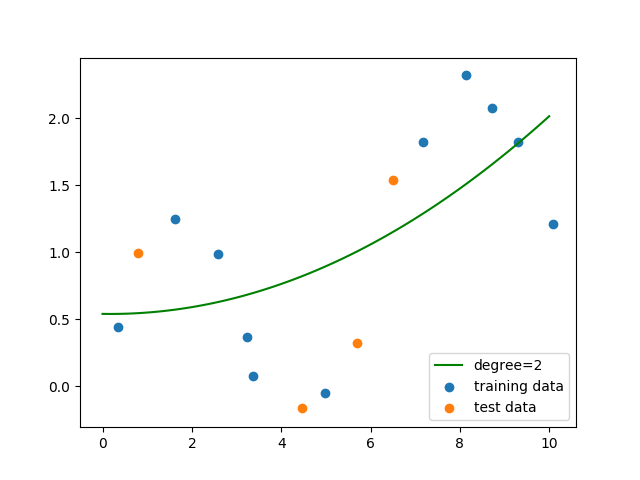

In [5]:
# Lets graph our predictions

%matplotlib notebook
import matplotlib.pyplot as plt

# Graph showing X_train, X_test and the LinearRegression

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.plot(X_predict_input, y_predicted, c="green", label="degree=2")
plt.legend(loc=4);
plt.show()

# We can see it worked, we can see the polynomial regression with a degree value=2

In [13]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    
    # Iteration to generate the polynomial for every degree
    degrees = [1,3,6,9]
    results = []
    for i in degrees:

        # Polynomial transformation of the features
        # Here we change the degree in every iteration
        poly = PolynomialFeatures(degree=i, include_bias=False)
        X_train_poly = poly.fit_transform(X_train.reshape(-1,1))

        # Linear Regression of the transformed polynomial features
        linreg = LinearRegression()
        linreg.fit(X_train_poly, y_train)

        # Predictions by the Regression model
        # We define the values to predict
        X_predict_input = np.linspace(0, 10, 100).reshape(-1,1)
        # Remember! The values to predict must also be transformed to the same degree as the features
        X_predict_input_poly = poly.fit_transform(X_predict_input)

        # Predictions
        y_predicted = linreg.predict(X_predict_input_poly)

        # Appends the predictions for each degree
        results.append(y_predicted)

    # Transforms the list into an array, each row contains the predictions for each degree
    # It generates an array with shape (4, 100)
    results = np.array(results)
    

    return results

In [14]:
answer_one().shape

(4, 100)

<IPython.core.display.Javascript object>


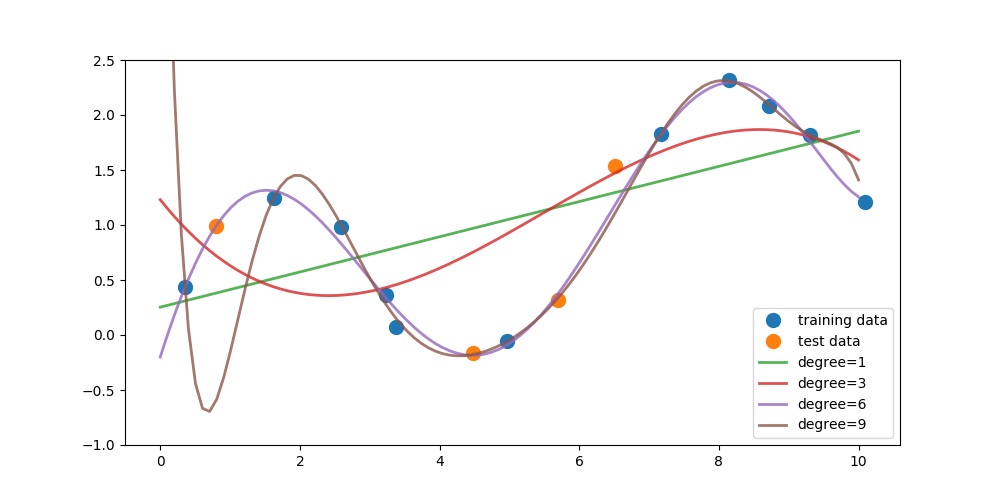

In [9]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [48]:
#### Detailed description of the process to solve answer_two() using sklearn.metrics.r2_score ####

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score


# Initialize list to store the scores
train_scores = []
test_scores = []

# Iteration to generate the polynomial for every degree with values between [0-9]
degrees = range(10)
for degree in degrees:
    
    ## Polynomial transformation of the features ##
    # Here we define different values of include_bias according to the value of degree
    # include_bias is only True when degree=0
    if degree == 0:
        bias = True
    else:
        bias= False
        
    # Here we change the degree in every iteration and define include_bias=True only when degree=0 else include_bias=False
    poly = PolynomialFeatures(degree=degree, include_bias=bias)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

    ## Linear Regression of the transformed polynomial features
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)
    
    
    ## Predictions of y values for each data set
    y_train_predicted = linreg.predict(X_train_poly)
    y_test_predicted = linreg.predict(X_test_poly)
    
    
    ## Scores using sklearn.metrics.r2_score
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    # 2_score(y_true, y_predicted)
    test_score = r2_score(y_test, y_test_predicted)
    train_score = r2_score(y_train, y_train_predicted)
    
    test_scores.append(test_score)
    train_scores.append(train_score)
    

# After all the iterations  
# Lets transform the list into arrays
test_scores = np.array(test_scores)
train_scores = np.array(train_scores)
# Lets define the number of decimals of the arrays to 5
test_scores = np.around(test_scores, decimals=5)
train_scores = np.around(train_scores ,decimals=5)


# After all the iterations we generate a tuple with to arrays containing the values of each score list
tupla = (train_scores , test_scores)

In [49]:
tupla

(array([ 0.     ,  0.42925,  0.4511 ,  0.5872 ,  0.91942,  0.97579,
         0.99018,  0.99353,  0.99638,  0.99804]),
 array([-0.47809, -0.45237, -0.06857,  0.00533,  0.73005,  0.87708,
         0.92141,  0.92022,  0.63248, -0.64526]))

In [45]:
print(type(tupla), len(tupla), tupla[0].shape, tupla[1].shape)

# We can see that the tuple is made of two arrays with the shape (10,)

<class 'tuple'> 2 (10,) (10,)


In [50]:
#### Another detailed description of the process to solve answer_two() WITHOUT using sklearn.metrics.r2_score ####
### The LinearRegression()score() is used instead ###


# Initialize list to store the scores
train_scores = []
test_scores = []

# Iteration to generate the polynomial for every degree with values between [0-9]
degrees = range(10)
for degree in degrees:
    
    ## Polynomial transformation of the features ##
    # Here we define different values of include_bias according to the value of degree
    # include_bias is only True when degree=0
    if degree == 0:
        bias = True
    else:
        bias= False
        
    # Here we change the degree in every iteration and define include_bias=True only when degree=0 else include_bias=False
    poly = PolynomialFeatures(degree=degree, include_bias=bias)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))

    ## Linear Regression of the transformed polynomial features
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)

    ## Determining the coefficient of determination
    # Important! Here the X_test values must also be transformed into a polynomial to be scored
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    
    # Calculating the R^2 scores for each set
    train_score = linreg.score(X_train_poly,y_train)
    test_score = linreg.score(X_test_poly,y_test)
    
    # Appending the values of each iteration to a list
    train_scores.append(train_score)
    test_scores.append(test_score)

    
# After all the interations  
# Lets transform the list into arrays
test_scores = np.array(test_scores)
train_scores = np.array(train_scores)
# Lets define the number of decimals of the arrays to 5
test_scores = np.around(test_scores, decimals=5)
train_scores = np.around(train_scores ,decimals=5)

# After all the iterations we generate a tuple with to arrays containing the values of each score list

tupla_r2 = (train_scores , test_scores)
    
tupla_r2

# We can see that these scores match exactly the same as the previous method with r2_score

(array([ 0.     ,  0.42925,  0.4511 ,  0.5872 ,  0.91942,  0.97579,
         0.99018,  0.99353,  0.99638,  0.99804]),
 array([-0.47809, -0.45237, -0.06857,  0.00533,  0.73005,  0.87708,
         0.92141,  0.92022,  0.63248, -0.64526]))

In [51]:
# We confirm that both methods provide the exact same results because the tuples contain the same arrays values inside
print(tupla[0]==tupla_r2[0], tupla[1]==tupla_r2[1])


[ True  True  True  True  True  True  True  True  True  True] [ True  True  True  True  True  True  True  True  True  True]


In [52]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
# Initialize list to store the scores
    train_scores = []
    test_scores = []

    # Iteration to generate the polynomial for every degree with values between [0-9]
    degrees = range(10)
    for degree in degrees:

        ## Polynomial transformation of the features ##
        # Here we define different values of include_bias according to the value of degree
        # include_bias is only True when degree=0
        if degree == 0:
            bias = True
        else:
            bias= False

        # Here we change the degree in every iteration and define include_bias=True only when degree=0 else include_bias=False
        poly = PolynomialFeatures(degree=degree, include_bias=bias)
        X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
        X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

        ## Linear Regression of the transformed polynomial features
        linreg = LinearRegression()
        linreg.fit(X_train_poly, y_train)


        ## Predictions of y values for each data set
        y_train_predicted = linreg.predict(X_train_poly)
        y_test_predicted = linreg.predict(X_test_poly)


        ## Scores using sklearn.metrics.r2_score
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
        # 2_score(y_true, y_predicted)
        test_score = r2_score(y_test, y_test_predicted)
        train_score = r2_score(y_train, y_train_predicted)

        test_scores.append(test_score)
        train_scores.append(train_score)

        # After all the iterations we generate a tuple with to arrays containing the values of each score list
        tupla = (np.array(train_scores), np.array(test_scores)) 

    return tupla

In [53]:
answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247964, -0.64526425]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

<IPython.core.display.Javascript object>


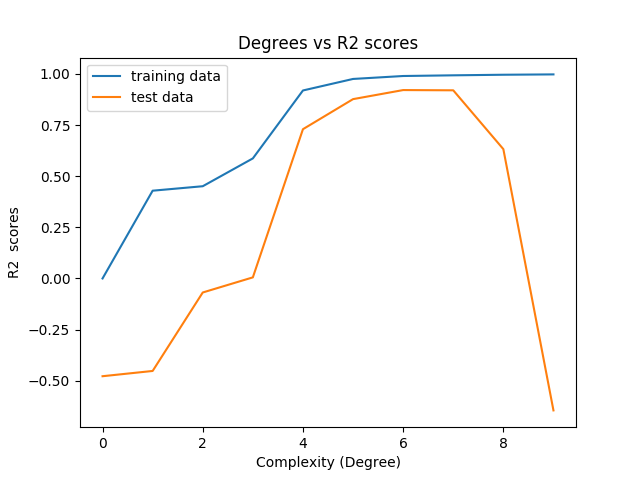

(2, 9, 7)

In [59]:
#### Detailed description of the process to solve answer_three() ###

# Lets use answer_two() to obtain the train and test scores for the different degrees (0-9) and unpack them in to variables
train_scores, test_scores = answer_two()
degrees = range(len(train_scores))

# Lets graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(degrees, train_scores, label='training data')
plt.plot(degrees, test_scores, label='test data')
plt.title('Degrees vs R2 scores')
plt.xlabel('Complexity (Degree)')
plt.ylabel('R2  scores')
plt.legend(loc=2);
plt.show()

# According to the graph we can choose the propper degrees (Underfitting, Overfitting, Good_Generalization)
result = (2,9,7)

result

In [60]:
def answer_three():
    
#     # Lets use answer_two() to obtain the train and test scores for the different degrees (0-9) and unpack them in to variables
#     train_scores, test_scores = answer_two()
#     degrees = range(10)

#     # Lets graph
#     import matplotlib.pyplot as plt
#     plt.figure()
#     plt.plot(degrees, train_scores, label='training data')
#     plt.plot(degrees, test_scores, label='test data')
#     plt.title('Degrees vs R2 scores')
#     plt.xlabel('Complexity (Degree)')
#     plt.ylabel('R2  scores')
#     plt.legend(loc=2);
#     plt.show()

#     # According to the graph we can choose the propper degrees (Underfitting, Overfitting, Good_Generalization)
    # This answer should only return a tuple with three values
    result = (2,9,7)

    return result

In [61]:
answer_three()

(2, 9, 7)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [79]:
#### Detailed description of the process to solve answer_four() ####

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

## 1st Polynomial degree 12 transformation of X_train and X_test(features) ##
# We will use X_train to train the model and X_test to predict values and compute the R2
poly = PolynomialFeatures(degree=12, include_bias=False)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

## 2nd Regression models:

# A- Linear Regression of the transformed polynomial features with default parameters

# Lets create and train the model
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# Lets predict the X_test_poly values using the Linear Regression model
# Be careful here, we should use X_test_poly to compute the predictions and the R2!!
y_test_predicted_linreg = linreg.predict(X_test_poly)

# Lets compute the score between the true values and predicted ones
LinearRegression_R2_test_score = r2_score(y_test, y_test_predicted_linreg)


# B- Lasso Regression of the transformed polynomial features

# Lets create and train the model
linlasso = Lasso(alpha=0.01, max_iter=10000)
linlasso.fit(X_train_poly, y_train)

# Lets predict the X_test_poly values using the Lasso model
# Be careful here, we should use X_test_poly to compute the predictions and the R2!!
y_test_predicted_lasso = linlasso.predict(X_test_poly)

# Score
Lasso_R2_test_score = r2_score(y_test, y_test_predicted_lasso)

# Result
result = (LinearRegression_R2_test_score, Lasso_R2_test_score)

print(result)

(-4.3070384056809026, 0.84066256147502494)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [80]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    ## 1st Polynomial degree 12 transformation of X_train and X_test(features) ##
    # We will use X_train to train the model and X_test to predict values and compute the R2
    poly = PolynomialFeatures(degree=12, include_bias=False)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

    ## 2nd Regression models:
    # A- Linear Regression of the transformed polynomial features
    # Lets train the model
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)
    # Lets predict the X_test_poly values using the Linear Rgression model
    y_test_predicted_linreg = linreg.predict(X_test_poly)
    # Score
    LinearRegression_R2_test_score = r2_score(y_test, y_test_predicted_linreg)


    # B- Lasso Regression of the transformed polynomial features
    # Lets train the model
    linlasso = Lasso(alpha=0.01, max_iter=10000)
    linlasso.fit(X_train_poly, y_train)
    # Lets predict the X_train_poly values using the Lasso model
    y_test_predicted_lasso = linlasso.predict(X_test_poly)
    # Score
    Lasso_R2_test_score = r2_score(y_test, y_test_predicted_lasso)

    
    # Result
    result = (LinearRegression_R2_test_score, Lasso_R2_test_score)

    return result

In [83]:
answer_four()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3070384056809026, 0.84066256147502494)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Lets open the data file into pandas
# Here we use try/except because the are reports in the discussion forum that the mushrooms.csv is not 
# in readonly/mushrooms.csv but rather in the same folder as the script
try:
    mush_df = pd.read_csv('mushrooms.csv')
except:
    mush_df = pd.read_csv('readonly/mushrooms.csv')
# Lets change the categorical variables into numerical variables, new columns will be added.
# For each categorical variable, a new column is created and filled with 0s and 1s accordingly.
mush_df2 = pd.get_dummies(mush_df)

# Lets divide the data into classes(types of mushrooms) and their features, y and X sets.
X_mush = mush_df2.iloc[:,2:]
# As we choose the second column "class_p" the value 1 stands for poisonous mushrooms.
y_mush = mush_df2.iloc[:,1]

# Lets generate the train and test sets of data:
# With the default parameters 75% of the instances will we assigned to the train data sets (X_train2 and y_train2)
# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

In [87]:
# Lets see the df with the original columns and their variables
mush_df.head()

# It has 23 columns

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [105]:
# Lets see the df with the dummy variables.
# We can see that previously the class column had 2 variables: p and e, but in the new df they each have their own column:
# class_e and class_p. Each columns has 1 were the value is in the old df.
mush_df2.head()

# It has 119 columns!

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [104]:
#### Detailed description of the process to solve answer_five() ####

from sklearn.tree import DecisionTreeClassifier

# Lets create and train the classifier with default parameters and random_state=0
clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)


# clf has the clf.feature_importances_ attribute that contains the importante of each feature
# We can merge each feature name with its feature_importance_, sort them according to their values and save the five most important ones 
important_features_tuples = sorted(list(zip(X_train2.columns, clf.feature_importances_)), key=lambda x: x[1], reverse=True)[:5]

# Lets save the name of the five most important features
result = []
for tup in important_features_tuples:
    result.append(tup[0])

result
# As a result we obtain a list containing the five most important features according to this classifier

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [105]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Lets create and train the classifier with default parameters and random_state=0
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

    # Lets merge names and importances, sort them according to their descending importance and select the 5 biggest values
    important_features_tuples = sorted(list(zip(X_train2.columns, clf.feature_importances_)), key=lambda x: x[1], reverse=True)[:5]

    # Lets save the name of the five most important features
    result = []
    for tup in important_features_tuples:
        result.append(tup[0])

    return result

In [106]:
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [109]:
#### Detailed description of the process to solve answer_six() ####

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# We define the range of gamma values that we want to test in the SVC classifier
gamma_range = np.logspace(-4,1,6)

# We create the classifier
clf = SVC(kernel='rbf', C=1, random_state=0)

# We make the validation curve, it will make several cross validations with different values of gamma and retur the values
# As a result we obtain two arrays with shape (number of gamma values to test, number of cross validations)
# In this case the arrays will have the shape(6,3)
train_scores, test_scores = validation_curve(clf, X_subset, y_subset,
                                            param_name='gamma',
                                            param_range=gamma_range, # range of values to evaluate
                                            scoring = "accuracy", # type of scorer we want
                                            cv=3) # number of cross validations to make

# Be patient, this step can take a while..........

In [111]:
# Lets see the shape of the resulting arrays
train_scores

# We can see that for every of the 6 values of gamma (rows) there are 3 scores, son we can calculate the average of every row+
# to obtain the average_score of every gamma value tested

array([[ 0.58906135,  0.55686854,  0.55350554],
       [ 0.93200296,  0.9254062 ,  0.93726937],
       [ 0.99039172,  0.99039882,  0.9904059 ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ]])

In [112]:
# Now that we have the scores for each of the 3 cross validations done for each of the 6 gamma values,
# we can now find the average by making the average of all the values in a row
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(f'train mean scores for gamma = {train_scores_mean}')
print(f'test mean scores for gamma = {test_scores_mean}')

train mean scores for gamma = [ 0.56647847  0.93155951  0.99039881  1.          1.          1.        ]
test mean scores for gamma = [ 0.56768547  0.92959558  0.98965952  1.          0.99507994  0.52240279]


In [113]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
    # We define the range of gamma values that we want to test in the SVC classifier
    gamma_range = np.logspace(-4,1,6)

    # We create the classifier
    clf = SVC(kernel='rbf', C=1, random_state=0)

    # Validation curve
    train_scores, test_scores = validation_curve(clf, X_subset, y_subset,
                                                param_name='gamma',
                                                param_range=gamma_range, # range of values to evaluate
                                                scoring = "accuracy", # type of scorer we want
                                                cv=3) # number of cross validations to make
    
    # Average scores for every gamma value
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Lets create a tuple with both arrays
    result = (train_scores_mean,test_scores_mean)
    
    return result

In [114]:
answer_six()

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)` Please note there is only one correct solution.*

<IPython.core.display.Javascript object>


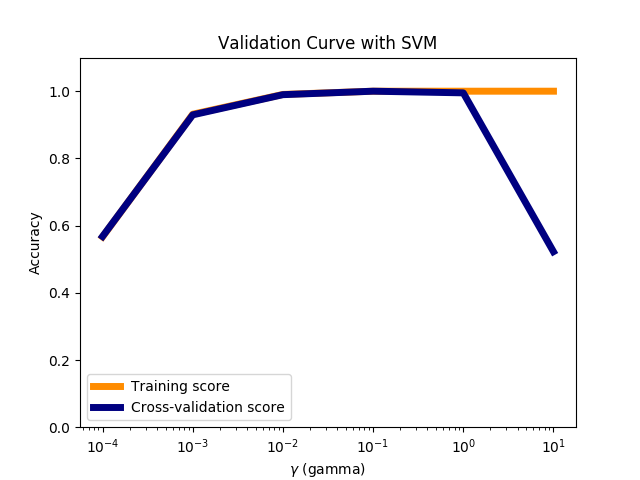

(0.0001, 10.0, 0.1)

In [117]:
import matplotlib.pyplot as plt

gamma_range = np.logspace(-4,1,6)

plt.figure()
plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)
lw = 5

plt.semilogx(gamma_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)
plt.semilogx(gamma_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)


plt.legend(loc='best')
plt.show()

# Watching the graph we can identify the gamma values in this order: (Underfitting, Overfitting, Good_Generalization)
result = (0.0001, 10.0, 0.1)

result

In [118]:
def answer_seven():
    
#     import matplotlib.pyplot as plt
    
#     # Lets unpack the results from answer_six()
#     train_scores_mean,test_scores_mean = answer_six()
#     gamma_range = np.logspace(-4,1,6)

#     plt.figure()
#     plt.title('Validation Curve with SVM')
#     plt.xlabel('$\gamma$ (gamma)')
#     plt.ylabel('Accuracy')
#     plt.ylim(0.0, 1.1)
#     lw = 5

#     plt.semilogx(gamma_range, train_scores_mean, label='Training score',
#                 color='darkorange', lw=lw)
#     plt.semilogx(gamma_range, test_scores_mean, label='Cross-validation score',
#                 color='navy', lw=lw)


#     plt.legend(loc='best')
#     plt.show()

    # Watching the graph we can identify the gamma values in this order: (Underfitting, Overfitting, Good_Generalization)
    result = (0.0001, 10.0, 0.1)

    return result

In [119]:
answer_seven()

(0.0001, 10.0, 0.1)